# Heart Disease Detection using ML

## Dataset Attributes

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

* Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

## Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
plt.style.use("seaborn-white")

## Load the dataset

In [2]:
df=pd.read_csv('./heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## EDA

### Check for Missing values

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

### Descriptive Stats

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Num of instances with and without heart disease

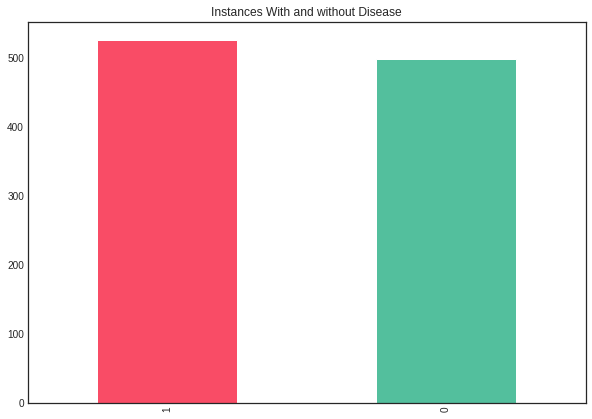

In [6]:
df['target'].value_counts().plot(kind='bar',color=['#F94C66','#53BF9D'],figsize=(10,7),)
plt.title('Instances With and without Disease');


We have appx 520 with heart diseas and 500 people without heart diseass.

Dataset is balanced

## Let's Identify categorical and Continous data columns

In [7]:
categorical_col = []
continous_col = []
for column in df.columns:
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - ')
    # unique values in ecah columns
    print(f"{column} : {df[column].unique()}")
    # if unique values in ecah column is less than 10 then it is considered catehorical else continous
    if len(df[column].unique()) <= 10:
        categorical_col.append(column)
    else:
        continous_col.append(column)

- - - - - - - - - - - - - - - - - - - - - - - - - - 
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
- - - - - - - - - - - - - - - - - - - - - - - - - - 
sex : [1 0]
- - - - - - - - - - - - - - - - - - - - - - - - - - 
cp : [0 1 2 3]
- - - - - - - - - - - - - - - - - - - - - - - - - - 
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
- - - - - - - - - - - - - - - - - - - - - - - - - - 
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 3

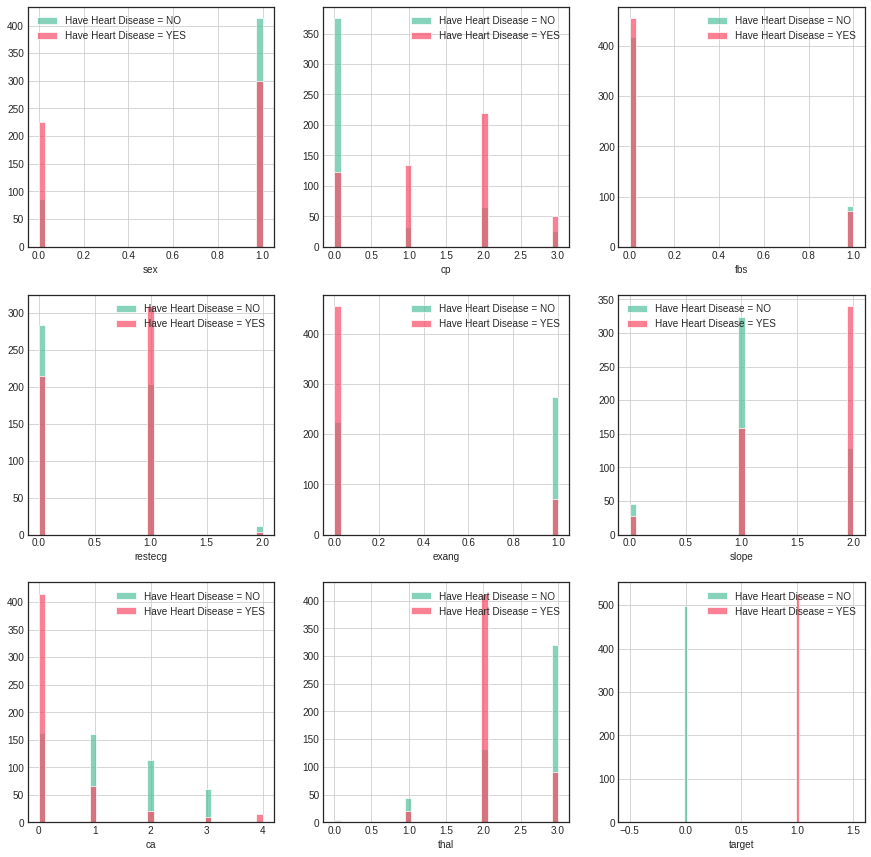

In [8]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='#53BF9D', label='Have Heart Disease = NO', alpha=0.7)
    df[df["target"] == 1][column].hist(bins=35, color='#F94C66', label='Have Heart Disease = YES', alpha=0.7)
    plt.legend()
    plt.xlabel(column)


## Insights

* People experiencing chest pain (cp 1, 2, or 3) are more likely to suffer heart disease than those with cp 0.

* restecg : people with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

* exang : People who score 0 (No ==> exercise-induced angina) have more heart disease than those who score 1 (Yes ==> exercise-induced angina).

* slope : People who have heart disease are more likely to have a slope value of 2 (Downslopins: symptoms of an unhealthy heart) than those who have a slope value of 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimum change (typical healthy heart)).

* ca : the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

* thal : People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease. 

## Lets Check the Distribution of Continous Values

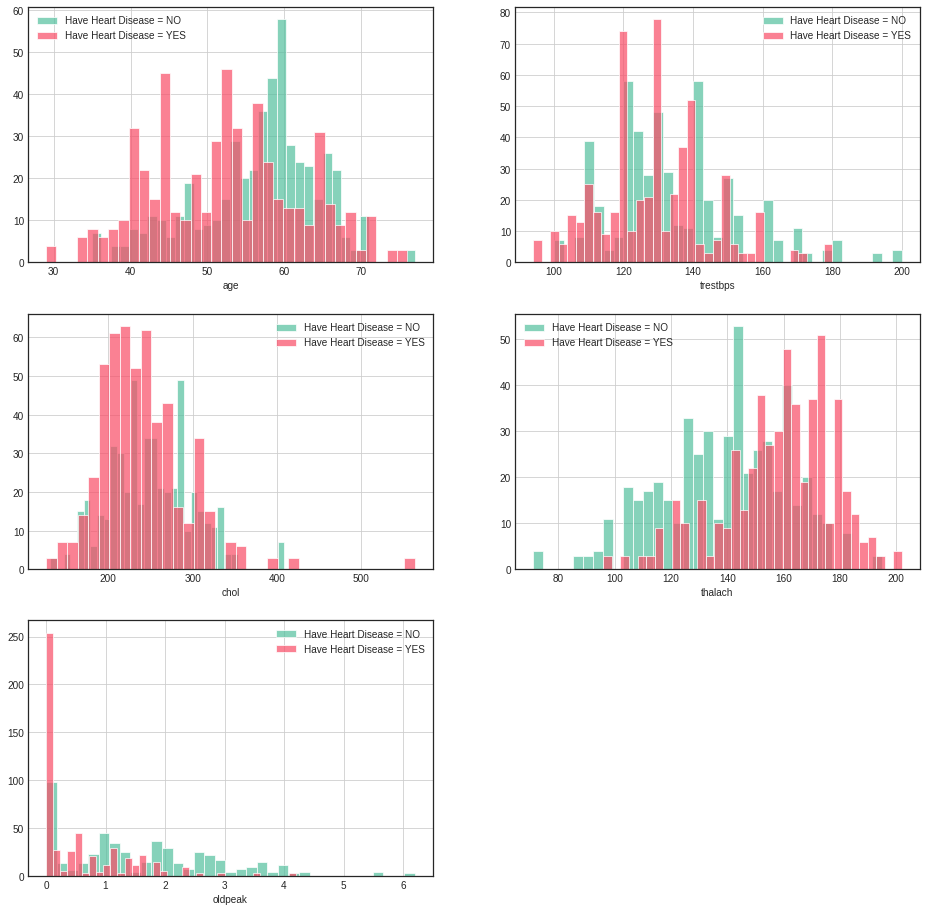

In [9]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(continous_col, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='#53BF9D', label='Have Heart Disease = NO', alpha=0.7)
    df[df["target"] == 1][column].hist(bins=35, color='#F94C66', label='Have Heart Disease = YES', alpha=0.7)
    plt.legend()
    plt.xlabel(column)

## Insights

* Blood pressure at rest (trestbps) Usually, anything above 130–140 is cause for concern.

* More than 200 cholesterol levels raise questions.
Thalath: Heart disease is more prevalent in those with maximal ages of over 140.

* The old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

## Heart Disease in function of Age and Max Heart Rate

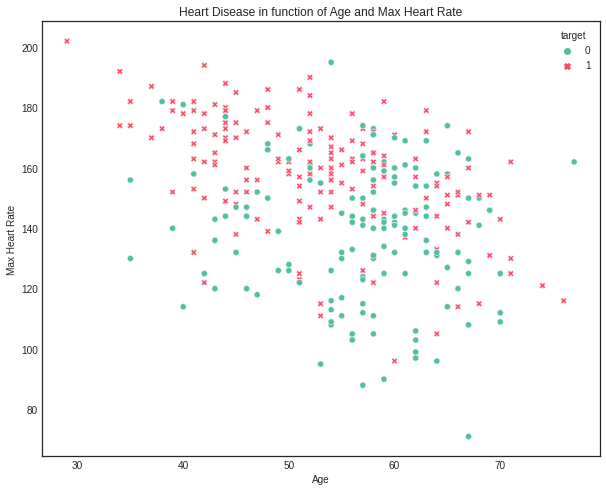

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.age, y = df.thalach, hue=df.target,palette=['#53BF9D','#F94C66'],style=df.target);
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

## Correlation Between Columns

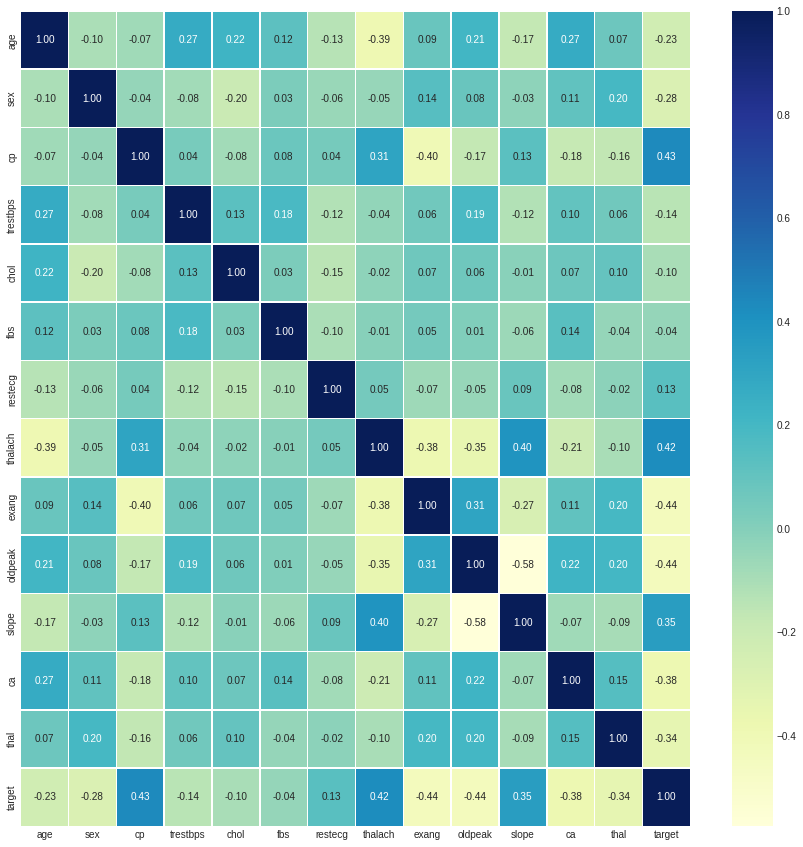

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## Correlation with target column

In [12]:
df_corr = df.iloc[:,:-1].corrwith(df.target)

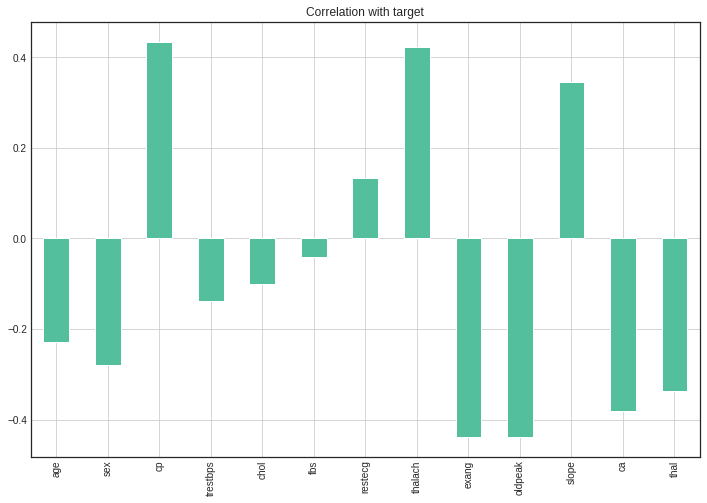

In [13]:
df_corr.plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color='#53BF9D');

## Data Preprocessing

### Categorical Column to dummy variable 
We Have observed that we need to convert some categorical variables to dummy variables and scale all values before training the machine learning models.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_col])
encoded_cols = list(encoder.get_feature_names(categorical_col))
encoded_cols

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sex_0',
 'sex_1',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3',
 'target_0',
 'target_1']

In [24]:
new_df=pd.DataFrame()
new_df[encoded_cols] = encoder.transform(df[categorical_col])

In [26]:
new_df.columns

Index(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'target_0', 'target_1'],
      dtype='object')

### Scaling data with standard Scaller

In [29]:
scaler = StandardScaler()
new_df[continous_col] = scaler.fit_transform(df[continous_col])

In [30]:
new_df

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,thal_1,thal_2,thal_3,target_0,target_1,age,trestbps,chol,thalach,oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.834359,0.364875,0.930822,-1.874977,0.705408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.503520,0.479107,-0.484803,0.647366,-0.912329
1021,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.613800,-0.377636,0.232705,-0.352873,1.471705
1022,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.819834,-1.234378,0.562371,-1.353113,-0.060888
1023,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.488996,-1.234378,0.155137,0.429923,-0.912329


## Input data and target

In [31]:
X = new_df
y = df.target

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Split data into train and test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification with Machine Learning

### Logistic Regression

In [37]:
lr = LogisticRegression(solver='liblinear')

In [38]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

#### Model Evaluation

In [40]:
def model_eval(clf, X_train, y_train, X_test, y_test, train_score=True):
    if train_score:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train_score==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [44]:
print(model_eval(lr, X_train, y_train, X_test, y_test, train_score=True))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    397.0  423.0       1.0      820.0         820.0
_______________________________________________
Confusion Matrix: 
 [[397   0]
 [  0 423]]

None


In [42]:
print(model_eval(lr, X_train, y_train, X_test, y_test, train_score=False))

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    102.0  103.0       1.0      205.0         205.0
_______________________________________________
Confusion Matrix: 
 [[102   0]
 [  0 103]]

None


## Amazing 

As we our model performance is wonderfull it is prediction with 100% accuracy on test and train dataset

## Saving our Model

In [45]:
import joblib

In [48]:
heart_disease ={
    'model':lr,
    'scaler':scaler,
    'encoder':encoder,
    'encoded_cols':encoded_cols,
    'categorical_col':categorical_col,
    'continous_col':continous_col,
}

In [49]:
joblib.dump(heart_disease,'heart_disease.joblib')

['heart_disease.joblib']